In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set_style('whitegrid')

## Get the input data to train on

In [2]:
observation = 1000

xs = np.random.uniform(-10,10,size=(observation,1))
zs = np.random.uniform(-10,10,size=(observation,1))

inputs = np.column_stack((xs,zs))

In [3]:
print(inputs.shape)

(1000, 2)


## Create target

In [4]:
noise = np.random.uniform(-1,1,size=(observation,1))
target = 13*xs + 7*zs - 12 + noise

## Plot the data

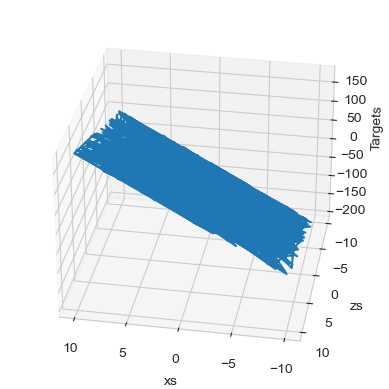

In [5]:
target = target.reshape(observation,)
xs = xs.reshape(observation,)
zs = zs.reshape(observation,)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,target)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)

plt.show()

## initilize weights and biases

In [6]:
target = target.reshape(observation,1)
xs = xs.reshape(observation,1)
zs = zs.reshape(observation,1)

In [7]:
int_range = 1

weights = np.random.uniform(-int_range,int_range,size=(inputs.shape[1],1))
biases = np.random.uniform(-int_range,int_range,size=(1))

In [8]:
print(weights.shape)
print(biases.shape)

(2, 1)
(1,)


## set a learning rate 

In [9]:
learning_rate = 0.05

## train the mode

In [10]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - target
    
    loss = np.sum(deltas ** 2) / 2 / observation
    print(i,loss)
    
    scaled_delta = deltas / observation
    weights = weights - learning_rate * np.dot(inputs.T, scaled_delta)
    biases = biases - learning_rate * np.sum(scaled_delta)

0 4172.556443290249
1 2359.4005043817765
2 1355.470749699228
3 790.6307030148762
4 469.28073659867596
5 284.83465858301906
6 178.04956478707894
7 115.58798011364121
8 78.54667253851376
9 56.15533449053175
10 42.25722195363777
11 33.323493840280086
12 27.326035454676333
13 23.09527853431386
14 19.953533934329936
15 17.5053468500854
16 15.517516695728402
17 13.850377674817794
18 12.418406139294078
19 11.167614686394845
20 10.0625591991152
21 9.078853323946515
22 8.19884019303756
23 7.409075706701822
24 6.698852657989281
25 6.059324131278768
26 5.482973059629906
27 4.963282738638994
28 4.494524900323322
29 4.071617359113067
30 3.690023536473139
31 3.3456778103761216
32 3.034927318809486
33 2.7544846899402566
34 2.501388387719665
35 2.272968644737823
36 2.066817701570313
37 1.8807635114129067
38 1.7128463309640547
39 1.56129777809875
40 1.4245220368113398
41 1.301078954853617
42 1.1896688236610593
43 1.0891186617483928
44 0.9983698465284649
45 0.9164669582524789
46 0.8425477151345105
47 0.

In [11]:
print(weights, biases)

[[12.99613474]
 [ 7.00650672]] [-11.93411663]


## Plot the data (outputs vs targets)

Text(0, 0.5, 'outputs')

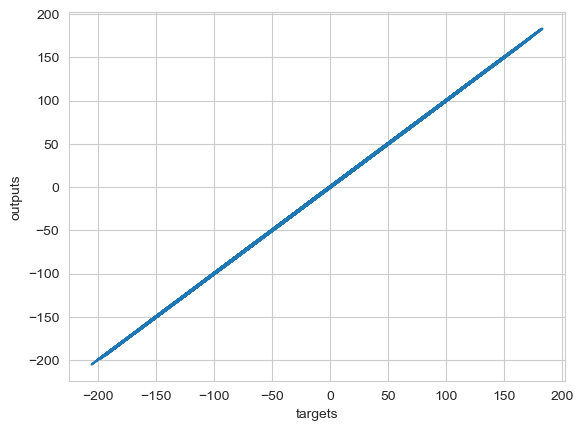

In [12]:
plt.plot(target,outputs)
plt.xlabel('targets')
plt.ylabel('outputs')